
# 支持向量机

* 支持向量机是二分类模型，是定义在特征空间上的间隔最大的线性分类器。支持向量机的学习算法是求解凸二次规划的最优化方法。

* 分为：线性可分支持向量机，线性支持向量机，非线性支持向量机。

### 线性可分支持向量机与硬间隔最大化

* 给定线性可分训练数据集，通过间隔最大化火等价地求解相应的凸二次规划问题学习到的分离超平面为
$$
w^*·x+b=0
$$

以及相应的分类决策函数
$$
f(x)=sign(w^*·x+b)
$$

称为线性可分支持向量机。

#### 1.函数间隔

对于给定的训练数据集T和超平面(w,b)，定义超平面(w,b)关于样本点$(x_i,y_i)$的函数间隔为
$$
\hat{\gamma_i}=y_i(w·x_i+b)
$$

#### 2.几何间隔

对于给定的训练数据集T和超平面(w,b)，定义超平面(w,b)关于样本点(x_i,y_i)的几何间隔为
$$
\gamma_i=y_i(\frac{w}{||w||}·x_i+\frac{b}{||w||})
$$

两者关系：
$$
\gamma_i=\frac{\hat{\gamma_i}}{||w||}
$$

#### 3.间隔最大化

* 支持向量机学习的基本想法是求解能够正确划分训练数据集并且几何间隔最大的分离超平面。间隔最大化是：对训练数据集找到几何间隔最大的超平面意味着以充分大的确信度对训练数据进行分类。

##### 最大间隔分离超平面的约束最优化问题：
$$
max_{w,b}  \gamma
$$

$$
s.t. y_i(\frac{w}{||w||}·x_i+\frac{b}{||w||}) \ge \gamma
$$

考虑两者的关系，改写为
$$
max_{w,b}  \frac{\hat{\gamma}}{||w||}
$$

$$
s.t. y_i(w·x_i+b) \ge \hat{\gamma}
$$

$\hat{\gamma}=1$等价于
$$
min_{w,b} \frac{1}{2}||w||^2
$$

$$
s.t. y_i(w·x_i+b) - 1 \ge 0
$$

##### 算法1-最大间隔法

* 输入：训练数据集
* 输出：最大间隔分离超平面和分类决策函数

（1）构造并求解约束最优化问题：
$$
min_{w,b} \frac{1}{2}||w||^2
$$

$$
s.t. y_i(w·x_i+b) - 1 \ge 0
$$

求解最优解$w^*,b^*$

（2）由此得到分类超平面：
$$
w^*·x+b^*=0
$$
分类决策函数
$$
f(x)=sign(w^*·x+b^*)
$$

##### 支持向量

* 在线性可分的情况下，训练数据集的样本点中与分离超平面距离最近的样本点的实例称为支持向量。

##### 间隔边界

* 在正负支持向量之间的距离称为间隔。间隔依赖于分离超平面的法向量w，等于$\frac{2}{||w||}$，H1和H2是间隔边界。

决定分离超平面的只有支持向量，其他实例点不起作用。

##### 线性可分支持向量机学习算法

* 输入：训练数据集
* 输出：分离超平面和分类决策函数

（1）构造并求解约束最优化问题
$$
min_a \frac{1}{2} \sum_{i=1}^{N}\sum_{j=1}^{N}a_ia_jy_iy_j(x_i·x_j)-\sum_{i=1}^{N}a_i
$$

$$
s.t. \sum_{i=1}^{N}a_iy_i=0
$$

$$
a_i \ge 0,i=1,2,...,N
$$

求得最优解$a^*=(a_1^*,a_2^*,...,a_N^*)^T$

（2）计算
$$
w^*=\sum_{i=1}^{N}a_i^*y_ix_i
$$
并选择$a^*$的一个正分量$a_j^*>0$，计算
$$
b^*=y_i-\sum_{i=1}^{N}a_i^*y_i(x_i·y_i)
$$

（3）分离超平面
$$
w^*·x+b^*=0
$$

分类决策函数
$$
f(x) =sign(w^*·x+b^*)
$$

$w^*,b^*$只依赖于$a_i^*>0$的样本点，这些点称为支持向量。

### 线性支持向量机与软间隔最大化

假设训练数据集存在某些特异样本点，使得数据集不是线性可分。也就是某些样本点不能满足函数间隔大于等于1的约束条件。为了解决这个问题，对每个样本点引进一个松弛变量$\xi \ge 0$，使函数间隔加上松弛变量大于等于1。这样约束最优化就变为：
$$
min_{w,b,\xi} \frac{1}{2}||w||^2+C\sum_{i=1}^{N}\xi_i
$$
$$
s.t. y_i(w·x_i+b)\ge 1-\xi_i
$$
$$
\xi_i \ge 0
$$

等价于
$$
min_{w,b}\sum_{N}^{i=1}[1-y_i(w·x_i+b)]_++\lambda||w||^2
$$

C是惩罚参数。

这样的模型为训练样本线性不可分时的线性支持向量机，间隔称为软间隔最大化。

#### 线性支持向量机

对于给定的线性不可分的训练数据集，通过求解凸二次规划问题（软间隔最大化），得到的分离超平面为
$$
w^*·x+b^*=0
$$
以及相应的分类决策函数
$$
f(x)=sign(w^*·x+b^*)
$$

##### 线性支持向量机学习算法

* 输入：训练数据集
* 输出：分离超平面和分类决策函数

（1）选择惩罚参数C>0，构造并求解约束最优化问题
$$
min_a \frac{1}{2} \sum_{i=1}^{N}\sum_{j=1}^{N}a_ia_jy_iy_j(x_i·x_j)-\sum_{i=1}^{N}a_i
$$

$$
s.t. \sum_{i=1}^{N}a_iy_i=0
$$

$$
0 \le a_i \le C,i=1,2,...,N
$$

求得最优解$a^*=(a_1^*,a_2^*,...,a_N^*)^T$

（2）计算
$$
w^*=\sum_{i=1}^{N}a_i^*y_ix_i
$$
并选择$a^*$的一个分量$0<a_j^*<C$，计算
$$
b^*=y_i-\sum_{i=1}^{N}a_i^*y_i(x_i·y_i)
$$

（3）分离超平面
$$
w^*·x+b^*=0
$$

分类决策函数
$$
f(x) =sign(w^*·x+b^*)
$$

##### 支持向量

* $a_i^*>0$的样本点的实例$x_i$称为支持向量。实例$x_i$到间隔边界的距离为$\frac{\xi_i}{||w||}$

* 软间隔的支持向量在间隔边界上，或者在间隔边界与分离超平面之间，或者在分离超平面误分的一侧。
    * $a_i^*<C, \xi_i=0$：在间隔边界上；
    * $a_i^*=C, 0 < \xi_i<1$：分类正确；
    * $a_i^*=C, \xi_i=1$：在分离超平面上；
    * $a_i^*=C, \xi_i>1$：在分离超平面误分类一侧；

##### 合页损失函数

线性支持向量机学习另一种就是最小化以下目标函数：
$$
\sum_{N}^{i=1}[1-y_i(w·x_i+b)]_++\lambda||w||^2
$$

目标函数的第1项是经验损失或经验风险，函数
$$
L(y(w·x+b))=[1-y_i(w·x_i+b)]_+
$$

称为合页损失函数。下标'+'表示以下取正值的函数
$$
[z]_+=\left\{\begin{matrix}
 z & z>0\\
 0 & z \le 0
\end{matrix}\right.
$$

当样本点$(x_i,y_i)$被正确分类且函数间隔（确信度）大于1时，损失是0，否则损失是$1-y_i(w·x_i+b)$。

### 非线性支持向量机与核函数

* 这类问题是非线性的，不能直接使用直接对其进行分类，需要使用曲线将其正确分类。一般解决此类问题是用线性分类方法求解非线性分类问题：1.首先使用一个变换将原空间的数据映射到新空间；2.在新空间里用线性分类学习方法从训练数据中学习分类模型。

核技巧就是通过一个非线性变换将输入空间对应于一个特征空间，使得在输入空间中的超曲面模型对应于特征空间中的超平面模型。

##### 核函数

* 设$\chi$是输入空间，又设$H$为特征空间，如果存在一个从$\chi$到$H$的映射
$$
\phi(x):\chi \to  H
$$

使得对所有$x,z\in \chi$，函数$K(x,z)$满足条件
$$
K(x,z)=\phi(x)·\phi(z)
$$

则称$K(x,z)$为核函数，$\phi(x)$为映射函数。

##### 正定核的充要条件

通常所说的核函数就是正定核函数。

* 设K:$\chi x \chi \to R$是对称函数，则$K(x,z)$为正定核函数的充要条件是对任意$x_i\in \chi$，$K(x,z)$对应的Gram矩阵：
$$
K = [K(x_i, x_j)]_{mxn}
$$

是半正定矩阵。

##### 正定核的等价定义

* 设$\chi \subset R^n$，$K(x,z)$是定义在$\chi x \chi$上的对称函数，如果对任意$x_i\in \chi$，$K(x,z)$对应的Gram矩阵
$$
K = [K(x_i, x_j)]_{mxn}
$$

是半正定矩阵，则称$K(x,z)$是正定核。

### 常用核函数

#### 1.多项式核函数

$$
K(x,z)=(x·z+1)^p
$$

#### 2.高斯核函数

$$
K(x,z)=exp(-\frac{||x-z||^2}{2\delta^2})
$$

#### 3.字符串核函数

### 非线性支持向量分类机

* 从非线性分类训练集，通过核函数与软间隔最大化，或凸二次规划，学习得到的分类决策函数
$$
f(x)=sign(\sum_{i=1}^{N}a_i^*y_iK(x,x_i)+b^*)
$$

称为非线性支持向量，$K(x,z)$是正定核函数。

##### 非线性支持向量机学习算法

* 输入：训练数据集$T={(x_1,y_1),(x_2,y-2),...,(x_N,y_N)}$
* 输出：分类决策函数

（1）选取适当的核函数K(x,z)和适当的参数C，构造并求解最优化问题
$$
min_\alpha \frac{1}{2}\sum_{i=1}^{N}\sum_{j=1}^{N}a_ia_jy_iy_jK(x_i,x_j)-\sum_{i=1}^{N}a_i
$$

$$
s.t. \sum_{i=1}{N}a_iy_i=0
$$
$$
0\le a_i \le C
$$

求得最优解$a^*=(a_1^*,a_2^*,...,a_N^*)$

（2）选择$a^*$的一个正分量$0<a_j^*<C$，计算
$$
b^*=y_j-\sum_{i=1}^{N}a_i^*y_iK(x_i·x_j)
$$

（3）构造决策函数：
$$
f(x)=sign(\sum_{i=1}^{N}a_i^*y_iK(x,x_i)+b^*)
$$

### SMO算法

* SMO算法是支持向量机学习的一种快读算法，其特点是不断地将原二次规划问题分解为只有两个变量的二次规划子问题，并对子问题进行解析求解，知道所有变量满足KKT条件为止。

#### 已知正例点$x_1=(1,2)^T,x_w=(2,3)^T,x_3=(3,3)^T$，负例点$x_4=(2,1)^T,x_5=(3,2)^T$，试求最大间隔分离超平面和分类决策函数。

In [1]:
from sklearn.svm import SVC

In [3]:
# 加载数据
X = [[1,2], [2,3], [3,3], [2,1], [3,2]]
y = [1,1,1,-1,-1]

# 训练SVM模型
clf = SVC(kernel='linear', C=10000)
clf.fit(X, y)

print('w: ', clf.coef_)
print('b: ', clf.intercept_)
print('support vectors: ', clf.support_vectors_)

w:  [[-1.  2.]]
b:  [-2.]
support vectors:  [[3. 2.]
 [1. 2.]
 [3. 3.]]


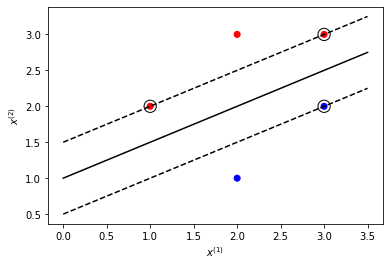

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# 绘制数据点
color_seq = ['red' if v == 1 else 'blue' for v in y]
plt.scatter([i[0] for i in X], [i[1] for i in X], c = color_seq)

# 得到x轴的所有点
xaxis = np.linspace(0, 3.5)
w = clf.coef_[0]

# 计算斜率
a = -w[0] / w[1]

# 得到分离超平面
y_seq = a * xaxis - (clf.intercept_[0]) / w[1]

# 下边界超平面
b = clf.support_vectors_[0]
yy_down = a * xaxis + (b[1] - a * b[0])

# 上边界超平面
b = clf.support_vectors_[-1]
yy_up = a * xaxis + (b[1] - a * b[0])

# 绘制超平面
plt.plot(xaxis, y_seq, 'k-')
plt.plot(xaxis, yy_down, 'k--')
plt.plot(xaxis, yy_up, 'k--')

# 绘制支持向量
plt.xlabel('$x^{(1)}$')
plt.ylabel('$x^{(2)}$')
plt.scatter(clf.support_vectors_[:,0],
           clf.support_vectors_[:,1],
           s = 150,
           facecolors='none',
           edgecolors='k')
plt.show()